Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.

# Data Processing

In [428]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [429]:
#loading the dataset
df=pd.read_excel("Final_Train.xlsx")

#lets see insights of the data sets
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [430]:
df.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [431]:
#checking the data types
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [432]:
#checking the column values
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [433]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [434]:
#cheking the shape
df.shape

(5961, 7)

#Observation
 There are 5961 rows and 7 columns 
FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

# Summary statistics

In [435]:
df.describe(include="all")

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [436]:
#there are 1420 unique combinations of qulification
#64 unique experices
#51 unique ratings and has null values
#values are recored in 877 different places over 6 different job profile ,place has null values
#fees is normaly distribusted since mean and median is almost same.but chances of outliers are high

# Data preprocessing

In [437]:
#Converting years of experince in to float

df['Experience'] = df['Experience'].str.replace(' years experience', '').astype(float)
#it has no null values

In [438]:
#conveting rating into float
df['Rating'] = df['Rating'].str.replace('%', '').astype(float)
#it has  null values
print(df['Rating'].skew())
#skewness is present hence it is better to replace with median
df['Rating'].fillna(df['Rating'].median(),inplace=True)

-3.277800928610422


In [439]:
#place has null values lets replace it with Not_Available
df['Place'] = df['Place'].fillna('Not_Available')
#we can create a sperate column called area
df['Area']=df['Place'].str.rsplit(',',1).str.get(0)
df['Place']=df['Place'].str.rsplit(',',1).str.get(1)
df['Place'] = df['Place'].fillna('Not_Available')

In [440]:
#lets drop "Miscellaneous_Info"
df=df.drop('Miscellaneous_Info',axis=1)

In [441]:

df['Qualification'].isnull().sum()


0

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   float64
 2   Rating         5961 non-null   float64
 3   Place          5961 non-null   object 
 4   Profile        5961 non-null   object 
 5   Fees           5961 non-null   int64  
 6   Area           5961 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 326.1+ KB


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   object 
 1   Experience     5961 non-null   float64
 2   Rating         5961 non-null   float64
 3   Place          5961 non-null   object 
 4   Profile        5961 non-null   object 
 5   Fees           5961 non-null   int64  
 6   Area           5961 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 326.1+ KB


# Univariant analysis

count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64


<AxesSubplot:xlabel='Fees', ylabel='Density'>

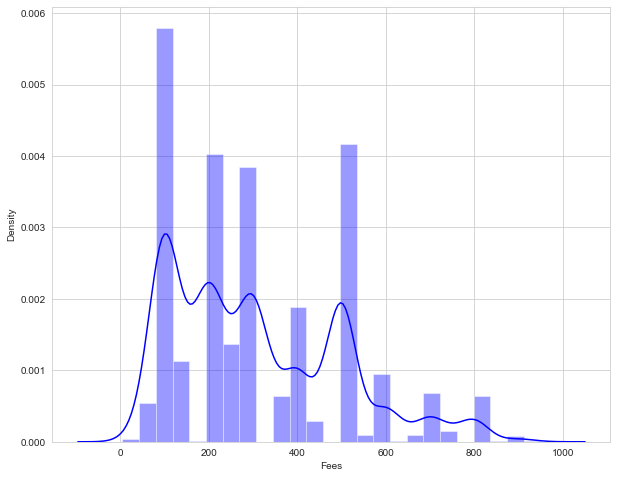

In [444]:
#Analysis of fees
print(df["Fees"].describe())
plt.figure(figsize=(10,8))
sns.distplot(df["Fees"],color="b")

In [445]:
#Observation
#Avearge consultation feees all over the county is 307
#minimum fees cahrged is 5 rs where as maximum is 950
# about 50% of doctors charge less than 300 rs

count    5961.000000
mean       95.948834
std         5.373459
min         7.000000
25%        97.000000
50%        97.000000
75%        97.000000
max       100.000000
Name: Rating, dtype: float64
0    97.0
dtype: float64


<AxesSubplot:xlabel='Rating', ylabel='Density'>

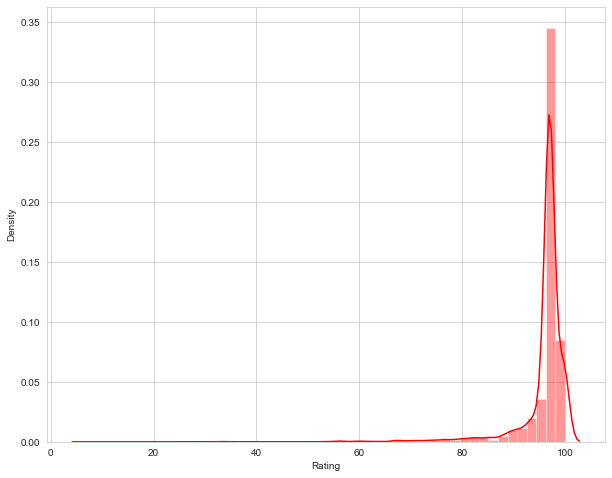

In [446]:
#Analysis of rating
print(df["Rating"].describe())
print(df["Rating"].mode())
plt.figure(figsize=(10,8))
sns.distplot(df["Rating"],color="r")

In [447]:
#Observation
#Avearge rating all over the county is 95%
#minimum rating is 7% where as maximum is 100%
# about 75% of doctors are rated 97% or above

Top 10 Qualification
BDS                                               488
BHMS                                              477
BAMS                                              471
MBBS                                              334
MBBS, MS - ENT                                    220
MBBS, MD - Dermatology                            178
MBBS, MD - General Medicine                       177
MBBS, MD - Dermatology , Venereology & Leprosy    140
BHMS, MD - Homeopathy                              93
MBBS, DDVL                                         92
Name: Qualification, dtype: int64


<AxesSubplot:ylabel='Qualification'>

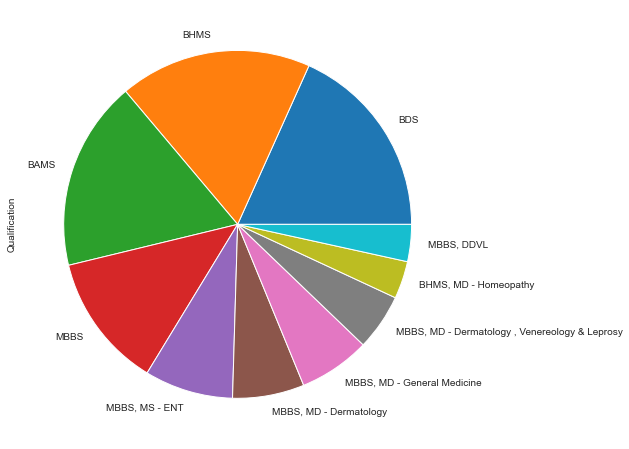

In [448]:
#Anlysis of top 10 qualification
df1=df["Qualification"].value_counts()
df1=df1.head(10)
print("Top 10 Qualification")
print(df1)
plt.figure(figsize=(10,8))
df1.plot(kind="pie")

In [449]:
#Observation
#Most of the doctors have atleast MBBS degree

Top 10 Places
 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Not_Available            26
Name: Place, dtype: int64


<AxesSubplot:ylabel='Place'>

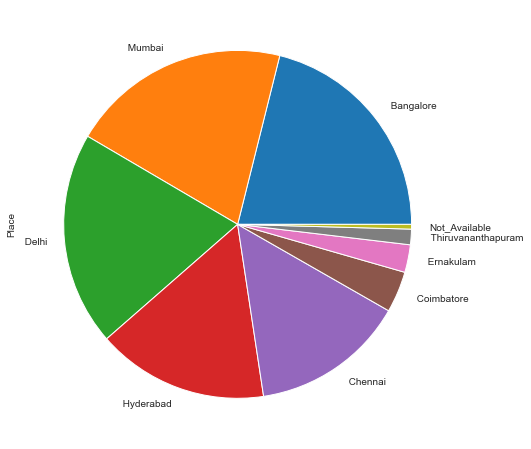

In [450]:
#Anlysis of top 10 places
df2=df["Place"].value_counts()
df2=df2.head(10)
print("Top 10 Places")
print(df2)
plt.figure(figsize=(10,8))
df2.plot(kind="pie")

In [451]:
#Observation
#most of the values are from banglore
#banglore mumbai dehli, hydrabad and chenni are top 5 placeses

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


(array([ 843.,    0.,  786.,    0.,  728.,    0., 1397.,    0., 1173.,
        1034.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

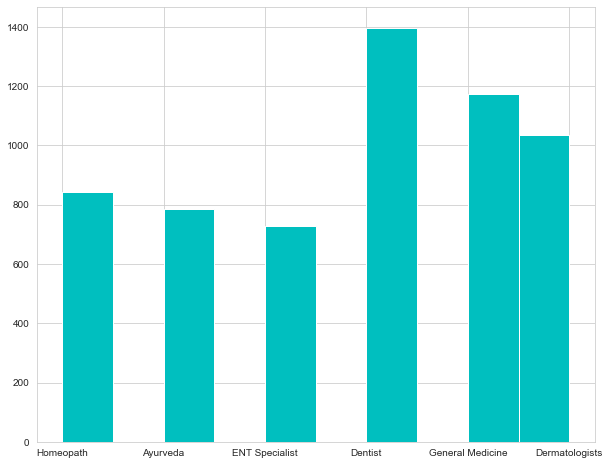

In [452]:
#Analysis of profile
print(df["Profile"].value_counts())
plt.figure(figsize=(10,8))
plt.hist(df["Profile"],color="c")

In [453]:
#Dentist are highest followed by general medicine and dermetolagist

count    5961.000000
mean       17.303976
std        11.142798
min         0.000000
25%         9.000000
50%        14.000000
75%        23.000000
max        66.000000
Name: Experience, dtype: float64


<AxesSubplot:xlabel='Experience', ylabel='Density'>

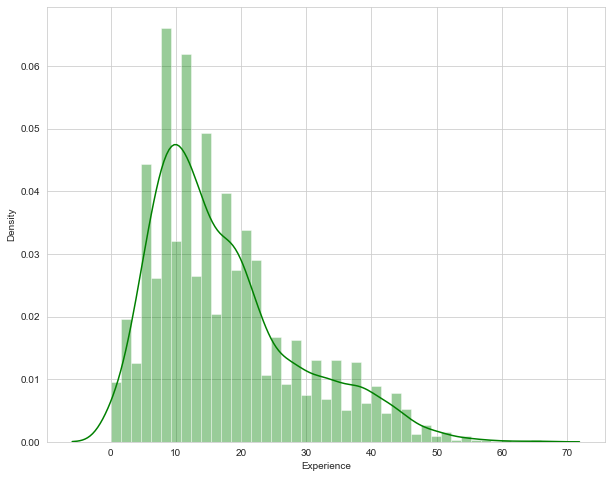

In [454]:
#Analysis of Experience
print(df["Experience"].describe())
plt.figure(figsize=(10,8))
sns.distplot(df["Experience"],color="g")

In [455]:
#Observation
#Avearge Experience all over the county is 17
#Minimum Experience  is 0  where as maximum is 66 years
#About 50% of doctors have Experience less than 14 years

# Bi variant analysis

Experience
0.0     197.931034
2.0     240.579710
3.0     257.747748
4.0     273.643478
5.0     292.553191
6.0     299.931193
7.0     291.745833
8.0     307.092199
9.0     299.659443
10.0    308.095238
Name: Fees, dtype: float64


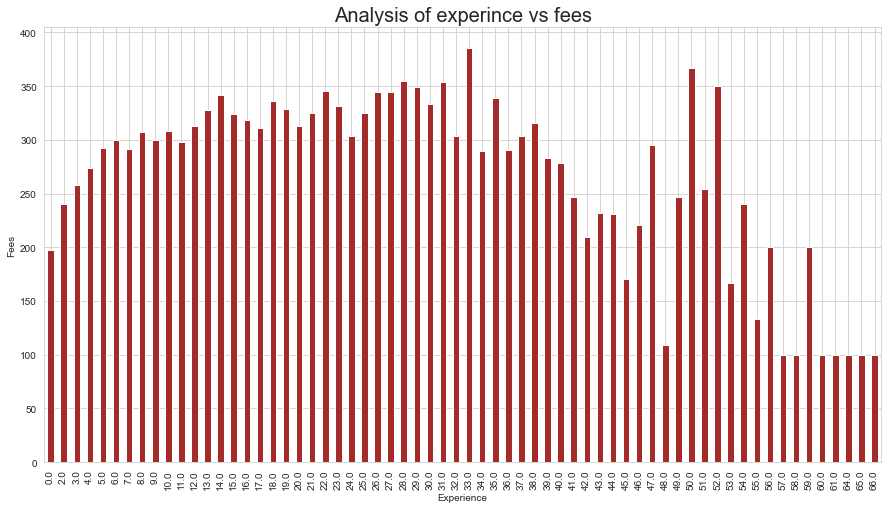

In [456]:
#Analysis of experince vs fees
df3=df.groupby("Experience").mean().sort_values(by="Experience",ascending=True)["Fees"]
print(df3.head(10))
plt.figure(figsize=(15,8))
df3.plot(kind='bar',color='brown')
plt.xlabel("Experience")
plt.ylabel("Fees")
plt.title("Analysis of experince vs fees",fontsize=20)
plt.show()

In [457]:
#Observation
#As we can see fees linearly increase first few years of experince

Rating
7.0     100.0
33.0    575.0
36.0    600.0
40.0    700.0
45.0    500.0
47.0    650.0
48.0    800.0
53.0    100.0
55.0    450.0
56.0    320.0
Name: Fees, dtype: float64


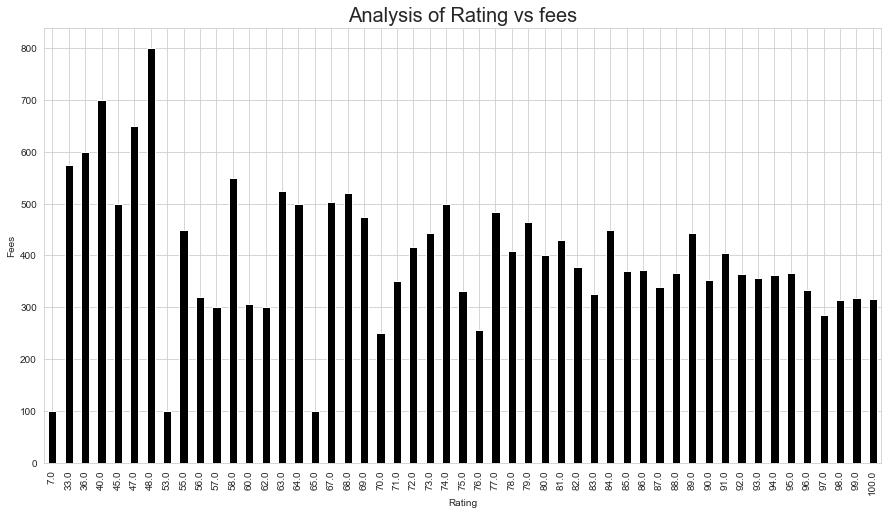

In [458]:
#Analysis of Rating vs fees
df4=df.groupby("Rating").mean().sort_values(by="Rating",ascending=True)["Fees"]
print(df4.head(10))
plt.figure(figsize=(15,8))
df4.plot(kind='bar',color='k')
plt.xlabel("Rating")
plt.ylabel("Fees")
plt.title("Analysis of Rating vs fees",fontsize=20)
plt.show()

In [459]:
#Observation
#Average fees decerses as rating increases.so we can say high rated doctors take less fees

Place
 Delhi                 362.911392
 Bangalore             328.842607
 Mumbai                308.292863
 Hyderabad             307.507886
 Chennai               283.602339
 Ernakulam             188.431373
 Thiruvananthapuram    167.267442
 Coimbatore            154.298246
Not_Available          107.692308
Name: Fees, dtype: float64


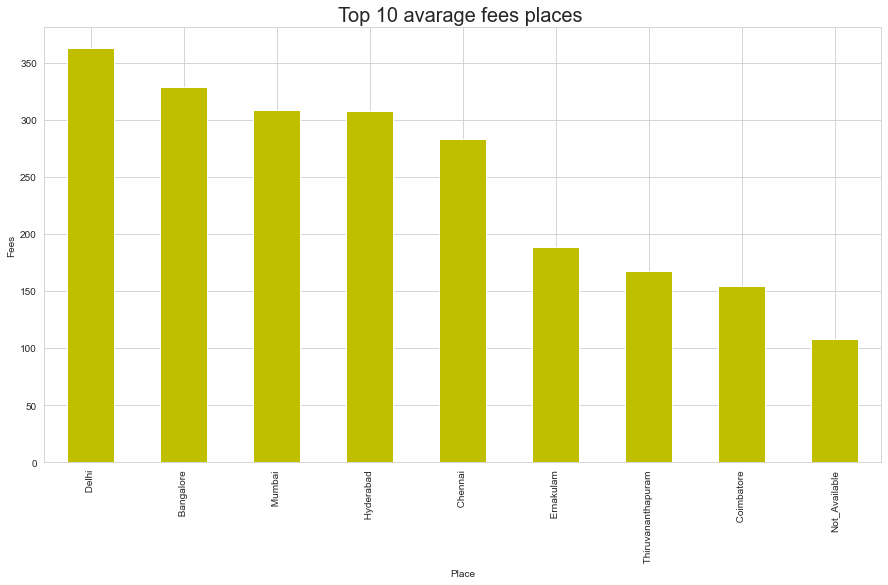

In [460]:
#Analysis of Place vs fees
df4=df.groupby("Place").mean()["Fees"].sort_values(ascending=False)
print(df4.head(10))
plt.figure(figsize=(15,8))
df4.head(10).plot(kind='bar',color='y')
plt.xlabel("Place")
plt.ylabel("Fees")
plt.title("Top 10 avarage fees places ",fontsize=20)
plt.show()

In [461]:
#observation
#Delhi has high avearge fees(362) followed by banglore (328)

Qualification
MD - General Medicine, DM - Nephrology, MBBS                                                                                                               900.0
MA - Psychology, BHMS                                                                                                                                      900.0
MBBS, DNB - Dermatology & Venereology, DDVL                                                                                                                900.0
BAMS, Member of the Royal Society for the Promotion of Health (UK) (MRSH)                                                                                  900.0
DNB - Dermatology & Venereology, DVD, MBBS, MCPS                                                                                                           900.0
MBBS, Fellowship in Diabetology(Royal Liverpool Academy, UK), Post Graduate Course in Diabetology, Certificate Course in Management of Thyroid Disorder    900.0
LCEH, BHMS          

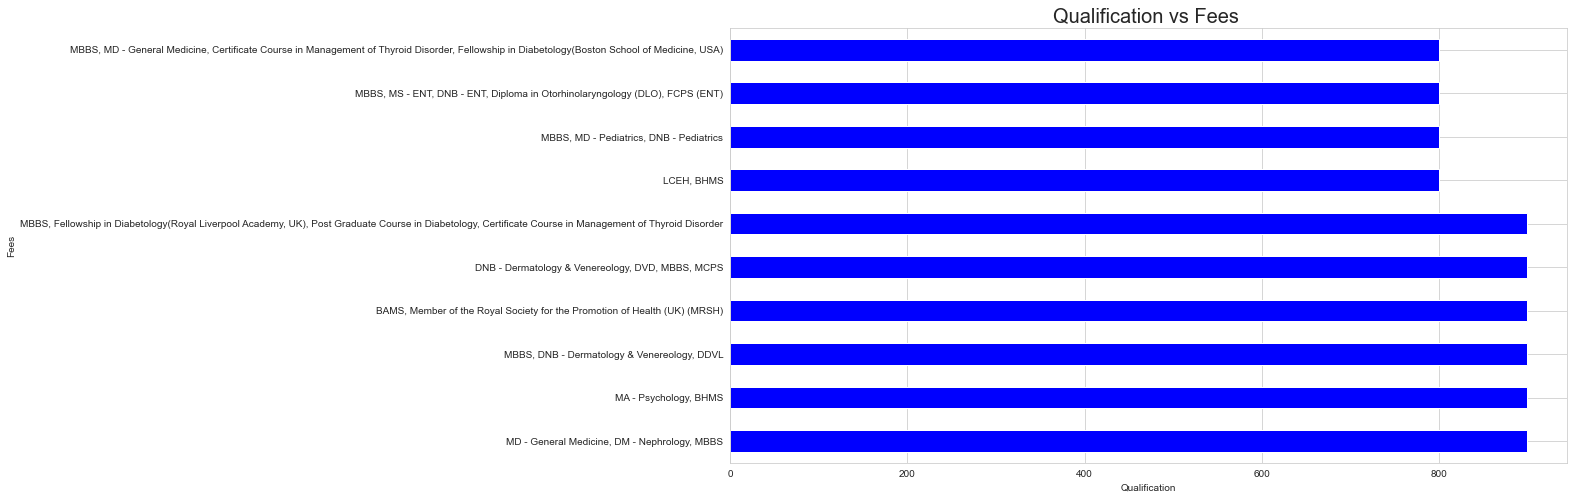

In [462]:
#Analysis of Place vs fees
df4=df.groupby("Qualification").mean()["Fees"].sort_values(ascending=False)
print(df4.head(10))
plt.figure(figsize=(15,8))
df4.head(10).plot(kind='barh',color='b')
plt.xlabel("Qualification")
plt.ylabel("Fees")
plt.title("Qualification vs Fees ",fontsize=20)
plt.show()

In [463]:
#you can see from graph qualification of top 10 highest consultation charges

# Multivariant analysis

Text(0.5, 1.0, 'chart shows the top 500 constultation Fees of doctor at different places and thier rating')

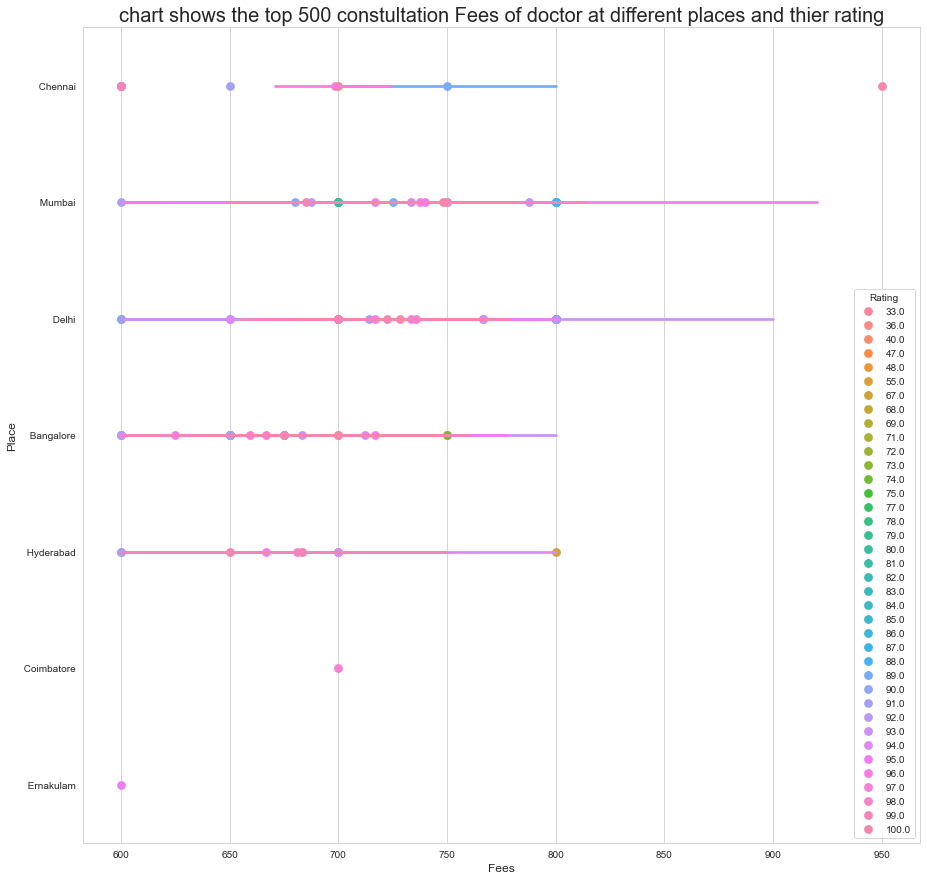

In [464]:
#Anlysis of top 500 costs for 2 people at various cities and for various ratings
df5=df.sort_values(by="Fees",ascending=False)
df5=df5.head(500)
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.pointplot(x='Fees', y='Place', data=df5, hue='Rating',join=False)
plt.xlabel('Fees',{'fontsize' : 'large'})
plt.ylabel('Place',{'fontsize':'large'})
plt.title("chart shows the top 500 constultation Fees of doctor at different places and thier rating",{'fontsize':20})

Experience       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Rating        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fees          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
dtype: object

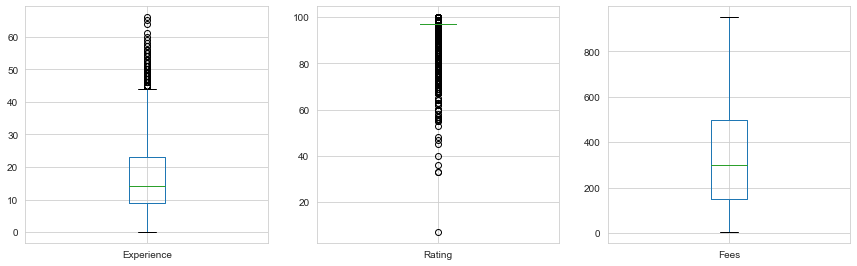

In [465]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(4,4),figsize=(20,20))

In [466]:
#columns rating and experince have heavy outliers

In [467]:
#Cheking skewness

df.skew()

Experience    0.991089
Rating       -5.257248
Fees          0.751870
dtype: float64

In [468]:
#Observation
#Doctor who is taking highest fee is presnt in chennai
#we can see most of the doctors are from banglore delhi and mumbai have verry good rating and most of the top doctors are from these cities


In [473]:
#Saperation of Profile Variable
df_qualification= pd.crosstab(df.Qualification, df.Profile, margins=True)
df_qualification=df_qualification.sort_values(by=['All'], ascending=False)
df_qualification.head()


Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Qualification,,,,,,,
All,786,1397,1034,728,1173,843,5961
BDS,0,488,0,0,0,0,488
BHMS,0,0,1,0,0,476,477
BAMS,470,0,0,0,0,1,471
MBBS,0,0,8,6,320,0,334


In [488]:
#lest add seperate columns
df['ayurveda'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bBAMS\b',),1,0)
df['ayurveda_md/ms'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMD\b') | df.Qualification.str.contains(r'\bMS\b'),1,0)


In [489]:
# Dentist
df['dentist_bds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bBDS\b'),1,0)
df['dentist_mds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bMDS\b'),1,0)
df['dentist_orthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'orthodon', case=False),1,0)
df['dentist_periodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'periodon', case=False),1,0)
df['dentist_prosthodontics'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'prosthodon', case=False),1,0)
df['dentist_oralandmaxi'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'Oral & Maxillofacial Surgery', case=False),1,0)
df['dentist_cosmetic'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

In [491]:
# Dermatology
df['dermatology_md'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['dermatology_venereology'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDV\b') | df.Qualification.str.contains(r'venereology', case=False)),1,0)
df['dermatology_leprosy'] = np.where((df.Profile == 'Dermatologists') & (df.Qualification.str.contains(r'\bDDVL\b') | df.Qualification.str.contains(r'leprosy', case=False)),1,0)
df['dermatology_dnb'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDNB\b'),1,0)
df['dermatology_cosmetic'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'cosmetic', case=False),1,0)

In [493]:
#ENT - MS, Otorhinolaryngology, Oncology
df['ent_ms'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ent_otorhinolaryngology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df['ent_oncology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'oncology', case=False),1,0)

In [494]:
#General Medicin 
df['gm_md'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['gm_cardio'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'cardio', case=False),1,0)
df['gm_surgery'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'surgery', case=False),1,0)
df['gm_diabet'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'diabet', case=False),1,0)
df['gm_child'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'child', case=False) | df.Qualification.str.contains(r'pediat', case=False)),1,0)
df['gm_chest'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'chest', case=False) | df.Qualification.str.contains(r'tuber', case=False)),1,0)
df['gm_obstet'] = np.where((df.Profile == 'General Medicine') & (df.Qualification.str.contains(r'obstet', case=False) | df.Qualification.str.contains(r'gyna', case=False)),1,0)
df['gm_pulmonary'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'pulmonary', case=False),1,0)
df['gm_psych'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'psych', case=False),1,0)
df['gm_endocrin'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'endocrin', case=False),1,0)
df['gm_rheum'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'rheum', case=False),1,0)

In [495]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,ayurveda,ayurveda_md,ayurveda_ms,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,"BHMS, MD - Homeopathy",24.0,100.0,Ernakulam,Homeopath,100,Kakkanad,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12.0,98.0,Bangalore,Ayurveda,350,Whitefield,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9.0,97.0,Bangalore,ENT Specialist,300,Mathikere - BEL,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12.0,97.0,Bangalore,Ayurveda,250,Bannerghatta Road,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BAMS,20.0,100.0,Chennai,Ayurveda,250,Keelkattalai,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [496]:
#n0ow lets drop the qualification column
df=df.drop('Qualification',axis=1)

# Data cleaning and transfomration

In [497]:


## Label Encoding:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

categorical_features = list(df.select_dtypes(include=['object']).columns)
for i in categorical_features:
    df[i] = lb.fit_transform(df[i])
df.head()

,Experience,Rating,Place,Profile,Fees,Area,ayurveda,ayurveda_md,ayurveda_ms,dentist_bds,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,24.0,100.0,4,5,100,297,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,98.0,0,0,350,857,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,97.0,0,3,300,453,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.0,97.0,0,0,250,68,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.0,100.0,1,0,250,336,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Index(['Experience', 'Rating', 'Place', 'Profile', 'Fees', 'Area', 'ayurveda',
       'ayurveda_md', 'ayurveda_ms', 'dentist_bds', 'dentist_mds',
       'dentist_orthodontics', 'dentist_periodontics',
       'dentist_prosthodontics', 'dentist_oralandmaxi', 'dentist_cosmetic',
       'ayurveda_md/ms', 'dermatology_md', 'dermatology_venereology',
       'dermatology_leprosy', 'dermatology_dnb', 'dermatology_cosmetic',
       'ent_ms', 'ent_otorhinolaryngology', 'ent_oncology', 'gm_md',
       'gm_cardio', 'gm_surgery', 'gm_diabet', 'gm_child', 'gm_chest',
       'gm_obstet', 'gm_pulmonary', 'gm_psych', 'gm_endocrin', 'gm_rheum'],
      dtype='object')

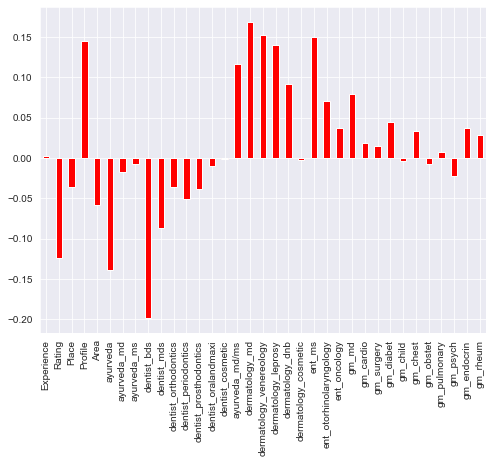

In [498]:
## Checking the correlation of the column with the target variable:
plt.figure(figsize=(8,6))
sns.set_style('dark')
df.drop(['Fees'],axis=1).corrwith(df['Fees']).plot(kind='bar',grid=True,color='r')
plt.xticks(rotation=90)

df.columns

In [499]:
#experince does not have any corealtion with fees we have to drop them
df=df.drop(['Experience','dermatology_cosmetic','gm_child'],axis=1)

In [500]:
df.columns


Index(['Rating', 'Place', 'Profile', 'Fees', 'Area', 'ayurveda', 'ayurveda_md',
       'ayurveda_ms', 'dentist_bds', 'dentist_mds', 'dentist_orthodontics',
       'dentist_periodontics', 'dentist_prosthodontics', 'dentist_oralandmaxi',
       'dentist_cosmetic', 'ayurveda_md/ms', 'dermatology_md',
       'dermatology_venereology', 'dermatology_leprosy', 'dermatology_dnb',
       'ent_ms', 'ent_otorhinolaryngology', 'ent_oncology', 'gm_md',
       'gm_cardio', 'gm_surgery', 'gm_diabet', 'gm_chest', 'gm_obstet',
       'gm_pulmonary', 'gm_psych', 'gm_endocrin', 'gm_rheum'],
      dtype='object')

In [537]:
#Assigning the variables for indipendent and dependent features
x=df.drop(labels='Fees',axis=1)
y=df['Fees']


In [538]:
x.skew()

Rating                     -5.257248
Place                       0.010640
Profile                     0.108803
Area                        0.107160
ayurveda                    2.236555
ayurveda_md                 5.684860
ayurveda_ms                11.381540
dentist_bds                 1.293695
dentist_mds                 2.234292
dentist_orthodontics        6.131494
dentist_periodontics        7.690246
dentist_prosthodontics      6.745916
dentist_oralandmaxi         7.335969
dentist_cosmetic           20.566987
ayurveda_md/ms              2.165962
dermatology_md              2.509248
dermatology_venereology     3.084009
dermatology_leprosy         3.178615
dermatology_dnb             6.835134
ent_ms                      2.967995
ent_otorhinolaryngology     3.729493
ent_oncology               20.566987
gm_md                       2.956508
gm_cardio                  13.331593
gm_surgery                 11.131042
gm_diabet                   6.745916
gm_chest                   19.228917
g

In [539]:
#lets remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))
x=pd.DataFrame(x)
x.skew()

0     -0.298024
1     -0.216506
2     -0.139151
3     -0.268800
4      2.236555
5      5.684860
6     11.381540
7      1.293695
8      2.234292
9      6.131494
10     7.690246
11     6.745916
12     7.335969
13    20.566987
14     2.165962
15     2.509248
16     3.084009
17     3.178615
18     6.835134
19     2.967995
20     3.729493
21    20.566987
22     2.956508
23    13.331593
24    11.131042
25     6.745916
26    19.228917
27    24.359809
28    20.566987
29    22.226125
30    18.120015
31    24.359809
dtype: float64

In [540]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x))

StandardScaler()


# Model Fitting

In [560]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting model:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrices:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [542]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [543]:
model_select(LinearRegression)

Max score is 0.16204901489746892 with random state 27


In [544]:
model_select(KNeighborsRegressor)

Max score is 0.11425825564029868 with random state 44


In [545]:
model_select(DecisionTreeRegressor)

Max score is 0 with random state 0


In [546]:
model_select(RandomForestRegressor)

Max score is 0.1919874921166833 with random state 95


In [547]:
model_select(AdaBoostRegressor)

Max score is 0.1409066092547554 with random state 27


In [548]:
model_select(GradientBoostingRegressor)

Max score is 0.22363364321728885 with random state 63


In [549]:
model_select(Ridge)

Max score is 0.1620261411076943 with random state 27


In [550]:
model_select(Lasso)

Max score is 0.15721692844965174 with random state 27


In [551]:
model_select(ElasticNet)

Max score is 0.1369543732009938 with random state 27


In [552]:
#from above model performance we can see that RandomForestRegressor and GradientBoostingRegressor gives best accuracy 

In [554]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=95)
print(x_train.shape, x_test.shape)

(4768, 32) (1193, 32)


In [579]:
#Hyperparameter tuning
#First we will see randomforest regressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)


grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 500}

In [580]:
rf =RandomForestRegressor(bootstrap=True,max_features='log2',min_samples_split=2,n_estimators=500)


rf.fit(x_train,y_train)
print(rf.score(x_train, y_train))

0.7857942235457498


In [581]:
#Lets chek with gradiant boost regressor
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

In [582]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
print(gb.score(x_train, y_train))

0.25299750034080315


In [583]:
#we can see random forest perform best
#lest chek cv score
cross_val_score(rf,x_train,y_train,cv=5).mean()

0.056686100542640075

In [589]:
#lets try to predict the values
predict=rf.predict(x_test)

pd.Series(predict)

0       180.456190
1       258.472121
2       187.483333
3       328.127143
4       398.060000
           ...    
1188    277.746667
1189    170.738918
1190    294.564286
1191    359.108333
1192    505.506786
Length: 1193, dtype: float64

In [590]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 0.13245542743493188
Mean absolute error is 136.41623888351063
Mean squared error is 32351.941823842644


In [591]:
y_test

2763    600
114     250
1982    200
1103    150
5778    500
       ... 
1954    250
1110    100
3998    100
5656    300
4861    300
Name: Fees, Length: 1193, dtype: int64

Text(0.5, 1.0, 'Predicted y vs y test')

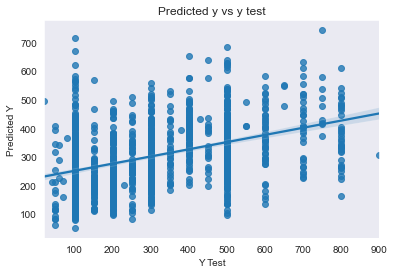

In [592]:
# Plotting the actual y and predicted y
sns.regplot(x=y_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Predicted y vs y test")

In [593]:
#lets save this model since this is the maximum accuracy we get
#Random forest performs best
#now we can the predict the fees based on the atributes values
import pickle

In [594]:
filename="Doctors_fees_train.pkl"
pickle.dump(rf,open(filename,"wb"))

We have Successfully saved our best model and now we will load the test data and do all the preprocessing and cleaning on our test data and then we will load our saved model from pickle library and apply it on our cleaned test data

In [595]:
#Let's load the test Data 

In [597]:
df_test=pd.read_excel("Final_Test.xlsx")

In [598]:
#Lets have some insighest of data
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [599]:
df_test.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...
1986,"MBBS, MD - Dermatology , Venereology & Leprosy",8 years experience,NaN,"Pallikaranai, Chennai",Dermatologists,"1 Feedback Pallikaranai, Chennai ₹500"


In [600]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [601]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [602]:
df_test.shape

(1987, 6)

In [603]:
df_test.describe(include="all")

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Andheri West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


# DATA cleaning and transforming

In [604]:
df_test['Rating'] = df_test['Rating'].str.replace('%', '').astype(float)
#it has  null values
print(df_test['Rating'].skew())
#skewness is present hence it is better to replace with median
df_test['Rating'].fillna(df_test['Rating'].median(),inplace=True)

-2.5613958323551618


In [605]:
#place has null values lets replace it with Not_Available
df_test['Place'] = df_test['Place'].fillna('Not_Available')
#we can create a sperate column called area
df_test['Area']=df_test['Place'].str.rsplit(',',1).str.get(0)
df_test['Place']=df_test['Place'].str.rsplit(',',1).str.get(1)
df_test['Place'] = df_test['Place'].fillna('Not_Available')

In [606]:
#lets drop "Miscellaneous_Info"
df_test=df_test.drop('Miscellaneous_Info',axis=1)

In [608]:
df_test['ayurveda'] = np.where((df_test.Profile == 'Ayurveda') & df_test.Qualification.str.contains(r'\bBAMS\b',),1,0)
df_test['ayurveda_md/ms'] = np.where((df_test.Profile == 'Ayurveda') & df_test.Qualification.str.contains(r'\bMD\b') | df_test.Qualification.str.contains(r'\bMS\b'),1,0)
df_test['dermatology_md'] = np.where((df_test.Profile == 'Dermatologists') & df_test.Qualification.str.contains(r'\bMD\b'),1,0)
df_test['dermatology_venereology'] = np.where((df_test.Profile == 'Dermatologists') & (df_test.Qualification.str.contains(r'\bDDV\b') | df_test.Qualification.str.contains(r'venereology', case=False)),1,0)
df_test['dermatology_leprosy'] = np.where((df_test.Profile == 'Dermatologists') & (df_test.Qualification.str.contains(r'\bDDVL\b') | df_test.Qualification.str.contains(r'leprosy', case=False)),1,0)
df_test['dermatology_dnb'] = np.where((df_test.Profile == 'Dermatologists') & df_test.Qualification.str.contains(r'\bDNB\b'),1,0)
df_test['dermatology_cosmetic'] = np.where((df_test.Profile == 'Dermatologists') & df_test.Qualification.str.contains(r'cosmetic', case=False),1,0)
df_test['ent_ms'] = np.where((df_test.Profile == 'ENT Specialist') & df_test.Qualification.str.contains(r'\bMS\b'),1,0)
df_test['ent_otorhinolaryngology'] = np.where((df_test.Profile == 'ENT Specialist') & df_test.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df_test['ent_oncology'] = np.where((df_test.Profile == 'ENT Specialist') & df_test.Qualification.str.contains(r'oncology', case=False),1,0)
df_test['gm_md'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'\bMD\b'),1,0)
df_test['gm_cardio'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'cardio', case=False),1,0)
df_test['gm_surgery'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'surgery', case=False),1,0)
df_test['gm_diabet'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'diabet', case=False),1,0)
df_test['gm_child'] = np.where((df_test.Profile == 'General Medicine') & (df_test.Qualification.str.contains(r'child', case=False) | df_test.Qualification.str.contains(r'pediat', case=False)),1,0)
df_test['gm_chest'] = np.where((df_test.Profile == 'General Medicine') & (df_test.Qualification.str.contains(r'chest', case=False) | df_test.Qualification.str.contains(r'tuber', case=False)),1,0)
df_test['gm_obstet'] = np.where((df_test.Profile == 'General Medicine') & (df_test.Qualification.str.contains(r'obstet', case=False) | df_test.Qualification.str.contains(r'gyna', case=False)),1,0)
df_test['gm_pulmonary'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'pulmonary', case=False),1,0)
df_test['gm_psych'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'psych', case=False),1,0)
df_test['gm_endocrin'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'endocrin', case=False),1,0)
df_test['gm_rheum'] = np.where((df_test.Profile == 'General Medicine') & df_test.Qualification.str.contains(r'rheum', case=False),1,0)

In [609]:
## Label Encoding:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

categorical_features = list(df_test.select_dtypes(include=['object']).columns)
for i in categorical_features:
    df_test[i] = lb.fit_transform(df_test[i])
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Area,ayurveda,ayurveda_md/ms,dermatology_md,dermatology_venereology,...,gm_cardio,gm_surgery,gm_diabet,gm_child,gm_chest,gm_obstet,gm_pulmonary,gm_psych,gm_endocrin,gm_rheum
0,241,28,97.0,6,4,142,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,340,24,97.0,5,3,578,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,258,34,70.0,1,2,212,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,97.0,3,0,373,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79,7,100.0,0,1,231,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [610]:
#experince does not have any corealtion with fees we have to drop them
df_test=df_test.drop(['Experience','dermatology_cosmetic','gm_child',"Qualification"],axis=1)
x_test=df_test

In [611]:
from sklearn.preprocessing import power_transform
x_test=power_transform(x_test,method=("yeo-johnson"))
x_test=pd.DataFrame(x_test)
x_test.skew()

0      0.000698
1     -0.040283
2     -0.065721
3     -0.053074
4      2.471995
5      5.966577
6     11.396916
7      1.270164
8      2.182256
9      5.966577
10     6.844460
11     7.167651
12     6.303258
13    17.204578
14     2.249065
15     2.771545
16     3.219193
17     3.413485
18     6.303258
19     3.109457
20     4.120555
21    17.204578
22     2.911998
23    11.396916
24    11.396916
25     6.427457
26    34.539832
27    34.539832
28    17.204578
29    19.891301
30    17.204578
31    24.392570
dtype: float64

In [612]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x_test))

StandardScaler()


In [613]:
#lets import the saved model and predict the values
filename= pickle.load( open( "Doctors_fees_train.pkl", "rb" ) )
filename

RandomForestRegressor(max_features='log2', n_estimators=500)

In [614]:
#lets predict the values
test_predict=filename.predict(x_test)
test_predict

array([169.6134127 , 273.90354978, 217.26333333, ..., 291.33333333,
       477.475     , 504.47345238])

In [618]:
test_predict=pd.DataFrame(test_predict).rename(columns = {0 : 'Cost'}).head()
test_predict.head()

,Cost
0,169.613413
1,273.903550
2,217.263333
3,188.980000
4,402.460000


In [619]:
#Let's save the predicted result into the csv file

test_predict.to_csv('Doctors_fees_tested.csv',index=False)